# NAME: ADENIJI DANIEL AKINLOLUWA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression

# Getting the first five rows

In [16]:
df = pd.read_csv(r'C:\Users\MY PC\Documents\Data Frame\cost_revenue_clean (1).csv')
df.head()

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527


# Getting information about the dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   production_budget_usd  5034 non-null   int64
 1   worldwide_gross_usd    5034 non-null   int64
dtypes: int64(2)
memory usage: 78.8 KB


# Descriptive statistics of our data

In [18]:
df.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [4]:
3.29e7

32900000.0

# Checking if there are outliers in our data set

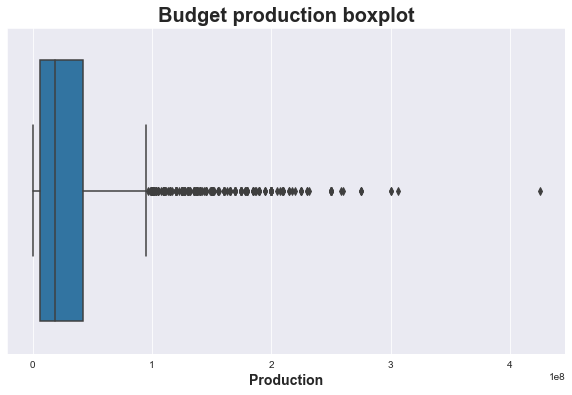

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='production_budget_usd');
plt.title('Budget production boxplot',fontweight='bold',fontsize=20)
plt.xlabel('Production',fontweight='bold',fontsize=14);

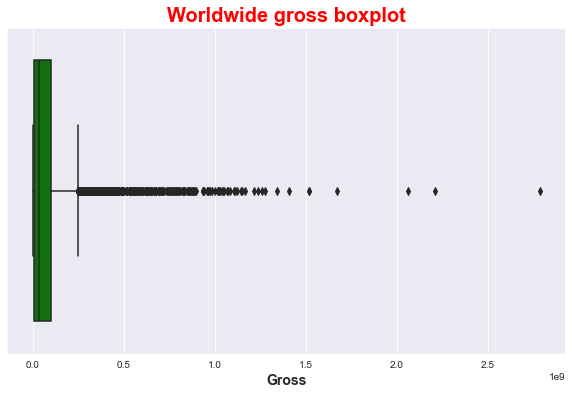

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='worldwide_gross_usd',color='green');
plt.title('Worldwide gross boxplot',fontweight='bold',fontsize=20,color='red')
plt.xlabel('Gross',fontweight='bold',fontsize=14);

In [53]:
X = df['production_budget_usd'].values.reshape((-1,1))
y = df['worldwide_gross_usd']

In [65]:
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

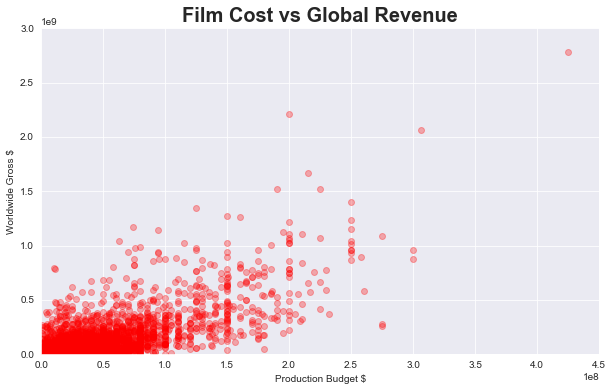

In [122]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3,color='red')
plt.title('Film Cost vs Global Revenue',fontweight='bold',fontsize=20)
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

**In addition to the boxplots above, it is evident that there are outliers in our dataset

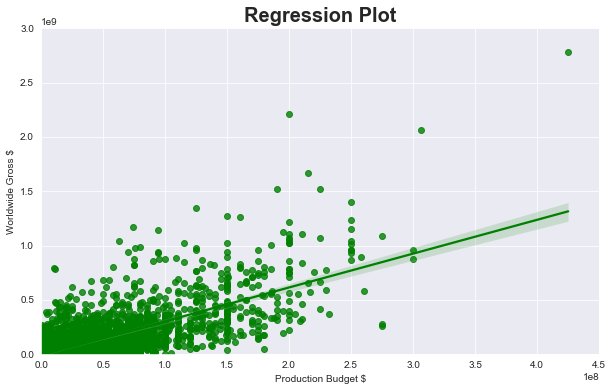

In [123]:
plt.figure(figsize=(10,6))
sns.regplot(x=df['production_budget_usd'], y=df['worldwide_gross_usd'],color='green')
plt.title('Regression Plot',fontweight='bold',fontsize=20)
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

In [124]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Slope coefficient:

In [125]:
regression.coef_    # theta_1

array([3.05422928])

In [126]:
#Intercept
regression.intercept_

-5712541.591496095

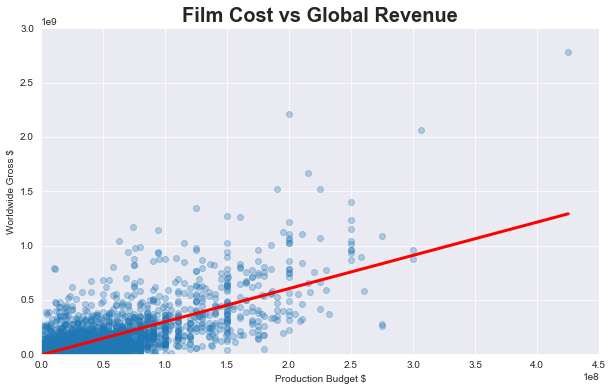

In [131]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)

plt.title('Film Cost vs Global Revenue',fontweight='bold',fontsize=20)
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0, 3000000000)
plt.xlim(0, 450000000)
plt.show()

**The above chart shows that both the targert and the features are linearly related

In [128]:
y_pred = regression.predict(X_test)
y_pred

array([1.56201126e+08, 1.92303162e+06, 2.05029279e+08, ...,
       1.62270069e+08, 6.45347320e+07, 1.77541215e+08])

In [129]:
r2_score(y_test,y_pred)

0.5911208868881261

# This means that 59.11% of the dependent variable is predicted by the independent variable.

In [130]:
#Getting r square from Regression
regression.score(X, y)

0.5494578809983623